# Bigramas

In [3]:
#pip install codebook

In [1]:
from collections import defaultdict
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import gensim

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import nltk

import pickle
import random
import sys
from tqdm import tqdm
from sklearn import manifold

from playsound import playsound
sys.path.append("C:/Users/paladugu/")
import codebook as cod


C:\Users\paladugu\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# pip install python-Levenshtein

In [3]:
import random
random.seed(100)
random_state = 100

In [4]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from gensim.models.phrases import Phrases, Phraser

In [5]:
path_df = "C:/Users/paladugu/Desktop/nps-generalli/nps-generalli/data/original/"
path_data_processed = "C:/Users/paladugu/Desktop/nps-generalli/nps-generalli/data/processed/"

#path_df = "..\\data\\original\\2019\\"
#path_data_processed = "..\\data\\processed\\2019\\"

In [6]:
comments = pd.read_csv(path_data_processed +"comments.csv")
print(f"Tamaño del Dataset: {comments.shape}")

Tamaño del Dataset: (125605, 48)


In [7]:
 comments["token"]

0         ['pedi', 'seguro', 'auto', 'agregaron', 'segur...
1                                                        []
2                                   ['calidad', 'servicio']
3                                   ['atencion', 'cliente']
4         ['verdad', 'xq', 'productor', 'vino', 'domicil...
                                ...                        
125600                   ['rapidez', 'solicitud', 'pedido']
125601                  ['rapidez', 'solucion', 'problema']
125602    ['bueno', 'atencion', 'bueno', 'resolucion', '...
125603    ['dado', 'cumplimiento', 'casi', 'prometio', '...
125604                                ['bueno', 'atencion']
Name: token, Length: 125605, dtype: object

In [8]:
word_list = comments.token.tolist()

In [9]:
print("el corpus tiene",len(word_list), "oraciones y",sum([len(x) for x in word_list]),"palabras")

el corpus tiene 125605 oraciones y 9155324 palabras


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        #vuelve todo a lower case y saca puntuaciones y convierte cada documento de texto en una lista de palabras
        #Return everything to lower case and score and convert each text document to a list of words
        yield(gensim.utils.simple_preprocess(str(sentence), deacc =True))

In [11]:
train_w = list(sent_to_words(word_list))

In [12]:
collocations = Phrases(sentences=train_w, min_count=10,threshold=0.5,scoring='npmi') # threshold: minimo score aceptado (threshold: minimum score accepted)

In [13]:
to_collocations = Phraser(collocations)

In [16]:
df_collocations =pd.DataFrame([x for x in collocations.export_phrases(train_w)],columns=["bigram","score"])
df_collocations.shape

TypeError: export_phrases() takes 1 positional argument but 2 were given

In [15]:
df_collocations.drop_duplicates().sort_values(by="score",ascending=False).head(50)

NameError: name 'df_collocations' is not defined

In [21]:
trainset_ngrams = to_collocations[train_w]

In [22]:
# Save / load an exported collocation model.
trainset_ngrams.save(path_data_processed+"bigrams2019.pkl")

C:\Users\paladugu\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\interfaces.py:93: UserWarning: corpus.save() stores only the (tiny) iteration object in memory; to serialize the actual corpus content, use e.g. MmCorpus.serialize(corpus)
  "corpus.save() stores only the (tiny) iteration object in memory; "


In [23]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

ModuleNotFoundError: No module named 'gensim.models.wrappers'

In [18]:
dictionary = corpora.Dictionary(trainset_ngrams)

In [19]:
# Create Corpus
corpus = [dictionary.doc2bow(text) for text in trainset_ngrams] #convierto cada documente a un(I convert each document to a)

In [20]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, iterations = 500, passes=10)

In [21]:
ldamodel.print_topics(10, 6)

[(0,
  '0.150*"rapidez" + 0.138*"eficiencia" + 0.046*"resolucion" + 0.041*"problema" + 0.028*"resolver" + 0.024*"solucionar"'),
 (1,
  '0.324*"atencion" + 0.078*"rapidez" + 0.022*"personal" + 0.022*"cliente" + 0.020*"telefonica" + 0.019*"tramite"'),
 (2,
  '0.274*"bueno" + 0.231*"bueno_atencion" + 0.173*"servicio" + 0.048*"rapidez" + 0.020*"trato" + 0.019*"auxilio"'),
 (3,
  '0.072*"siempre" + 0.056*"problema" + 0.053*"nunca" + 0.030*"caja" + 0.022*"ningun" + 0.019*"ahora"'),
 (4,
  '0.090*"auxilio" + 0.088*"cumplimiento" + 0.045*"tiempo" + 0.032*"tiempo_forma" + 0.025*"aca" + 0.023*"siempre"'),
 (5,
  '0.043*"seguro" + 0.022*"mas" + 0.022*"caja" + 0.018*"si" + 0.016*"auto" + 0.013*"poliza"'),
 (6,
  '0.039*"servicio" + 0.034*"conforme" + 0.027*"auxilio" + 0.022*"auto" + 0.019*"seriedad" + 0.016*"dias"'),
 (7,
  '0.066*"precio" + 0.026*"servicios" + 0.024*"caro" + 0.023*"confianza" + 0.020*"agil" + 0.020*"seguro"'),
 (8,
  '0.145*"respuesta" + 0.083*"rapidez" + 0.070*"problema" + 0.049

In [22]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(25,formatted=False)]

In [23]:
lda_coherence = CoherenceModel(topics=ldatopics, texts=trainset_ngrams, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

In [24]:
df_lda = pd.DataFrame([range(25),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()

In [25]:
df_lda.sort_values(by='coherence',ascending=False)[:10]

,topic_id,coherence,topic
5,5,0.156647,"[seguro, mas, caja, si, auto, poliza, anos, so..."
3,3,0.111823,"[siempre, problema, nunca, caja, ningun, ahora..."
0,0,0.0859557,"[rapidez, eficiencia, resolucion, problema, re..."
8,8,0.0810703,"[respuesta, rapidez, problema, solucion, siemp..."
4,4,0.0638072,"[auxilio, cumplimiento, tiempo, tiempo_forma, ..."
1,1,0.0553702,"[atencion, rapidez, personal, cliente, telefon..."
2,2,-0.0086404,"[bueno, bueno_atencion, servicio, rapidez, tra..."
9,9,-0.0434718,"[inmediata, informacion, amabilidad, puntualid..."
6,6,-0.063036,"[servicio, conforme, auxilio, auto, seriedad, ..."
7,7,-0.122497,"[precio, servicios, caro, confianza, agil, seg..."


In [26]:
#import pyLDAvis.gensim
#pyLDAvis.enable_notebook()
#pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [24]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=trainset_ngrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

NameError: name 'ldamodel' is not defined

In [28]:
topics_df = pd.DataFrame(ldamodel.print_topics(num_topics=10), columns=["topic", "word_prob"])

In [29]:
topic_dict = dict(zip(topics_df["topic"], topics_df["word_prob"]))

In [30]:
#Eficiencia
topic_dict[1]

'0.324*"atencion" + 0.078*"rapidez" + 0.022*"personal" + 0.022*"cliente" + 0.020*"telefonica" + 0.019*"tramite" + 0.019*"auxilio" + 0.017*"amable" + 0.015*"sucursal" + 0.013*"cordial"'

In [31]:
#Atencion
topic_dict[2]

'0.274*"bueno" + 0.231*"bueno_atencion" + 0.173*"servicio" + 0.048*"rapidez" + 0.020*"trato" + 0.019*"auxilio" + 0.019*"predisposicion" + 0.013*"personal" + 0.011*"asesoramiento" + 0.008*"cobertura"'

In [32]:
#poliza
topic_dict[3]

'0.072*"siempre" + 0.056*"problema" + 0.053*"nunca" + 0.030*"caja" + 0.022*"ningun" + 0.019*"ahora" + 0.014*"momento" + 0.013*"inconvenientes" + 0.012*"siniestro" + 0.012*"seguro"'

In [33]:
#rapidez
topic_dict[4]

'0.090*"auxilio" + 0.088*"cumplimiento" + 0.045*"tiempo" + 0.032*"tiempo_forma" + 0.025*"aca" + 0.023*"siempre" + 0.023*"demora" + 0.014*"confiable" + 0.014*"xq" + 0.014*"llegar"'

In [34]:
#bueno
topic_dict[5]

'0.043*"seguro" + 0.022*"mas" + 0.022*"caja" + 0.018*"si" + 0.016*"auto" + 0.013*"poliza" + 0.011*"anos" + 0.010*"solo" + 0.009*"siniestro" + 0.008*"bueno"'

In [35]:
#atencion
topic_dict[6]

'0.039*"servicio" + 0.034*"conforme" + 0.027*"auxilio" + 0.022*"auto" + 0.019*"seriedad" + 0.016*"dias" + 0.015*"vehiculo" + 0.013*"persona" + 0.013*"luego" + 0.011*"lugar"'

In [36]:
#tramite
topic_dict[7]

'0.066*"precio" + 0.026*"servicios" + 0.024*"caro" + 0.023*"confianza" + 0.020*"agil" + 0.020*"seguro" + 0.019*"precios" + 0.018*"empresa" + 0.018*"contratacion" + 0.017*"mejor"'

In [37]:
#siempre
topic_dict[8]

'0.145*"respuesta" + 0.083*"rapidez" + 0.070*"problema" + 0.049*"solucion" + 0.039*"siempre" + 0.022*"solucionaron" + 0.021*"siniestro" + 0.020*"necesite" + 0.017*"resolvieron" + 0.015*"inconveniente"'

In [38]:
#auxilio
topic_dict[9]

'0.036*"inmediata" + 0.031*"informacion" + 0.029*"amabilidad" + 0.027*"puntualidad" + 0.023*"cordialidad" + 0.022*"clientes" + 0.021*"empleados" + 0.020*"inconvenientes" + 0.020*"atienden" + 0.019*"comunicacion"'

In [39]:
#seguro
topic_dict[0]

'0.150*"rapidez" + 0.138*"eficiencia" + 0.046*"resolucion" + 0.041*"problema" + 0.028*"resolver" + 0.024*"solucionar" + 0.017*"siniestro" + 0.011*"amables" + 0.010*"cumplen" + 0.010*"seguridad"'

In [40]:
topics_df.to_csv(path_data_processed+"topics2019.csv")


<div> <h2 style = "color:red">Tendríamos que regularizar y entrenar topic models pero con cada tipo de cliente ("Ajustar por puntaje - ver score") (We would have to regularize and train topic models but with each type of client ("Adjust by score - see score")) </h2> </div>




In [41]:
comments["token"].head()

0           ['bueno', 'servicio', 'bueno', 'atencion']
1              ['eficiencia', 'amabilidad', 'rapidez']
2                                            ['bueno']
3    ['vienen', 'enseguida', 'siempre', 'solucionan...
4    ['cumplimiento', 'acuerdo', 'expectativas', 'h...
Name: token, dtype: object

In [42]:
comments.head()

,dummy_id,response,age,clv,recommend_prob,recommend_why,nps_segment,first_call_resol,issue_solved,customer_is_satisfied,clean_text,normal,token
0,1,2019-06-30 23:09:25,43.0,1,10,buen servicio y buena atención,Promotor,NaN,NaN,NaN,buen servicio y buena atencion,bueno servicio y bueno atencion,"['bueno', 'servicio', 'bueno', 'atencion']"
1,2,2019-06-30 22:56:03,75.0,1,10,"Eficiencia, amabilidad, rapidez",Promotor,NaN,NaN,NaN,eficiencia amabilidad rapidez,eficiencia amabilidad rapidez,"['eficiencia', 'amabilidad', 'rapidez']"
2,3,2019-06-30 22:52:33,23.0,1,10,Todo excelente,Promotor,NaN,NaN,NaN,todo excelente,todo bueno,['bueno']
3,4,2019-06-30 22:33:46,71.0,2,10,Vienen enseguida y siempre me solucionan el pr...,Promotor,NaN,NaN,NaN,vienen enseguida y siempre me solucionan el pr...,vienen enseguida y siempre me solucionan el pr...,"['vienen', 'enseguida', 'siempre', 'solucionan..."
4,5,2019-06-30 22:25:37,64.0,2,9,"Cumplió de acuerdo a mis expectativas, horario...",Promotor,NaN,NaN,NaN,cumplio de acuerdo a mis expectativas horarios,cumplimiento de acuerdo a mis expectativas hor...,"['cumplimiento', 'acuerdo', 'expectativas', 'h..."


In [43]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=comments["recommend_why"])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7750,"bueno, bueno_atencion, servicio, rapidez, trat...",buen servicio y buena atención
1,1,0.0,0.7750,"rapidez, eficiencia, resolucion, problema, res...","Eficiencia, amabilidad, rapidez"
2,2,2.0,0.5500,"bueno, bueno_atencion, servicio, rapidez, trat...",Todo excelente
3,3,3.0,0.6059,"siempre, problema, nunca, caja, ningun, ahora,...",Vienen enseguida y siempre me solucionan el pr...
4,4,4.0,0.6200,"auxilio, cumplimiento, tiempo, tiempo_forma, a...","Cumplió de acuerdo a mis expectativas, horario..."
5,5,5.0,0.3153,"seguro, mas, caja, si, auto, poliza, anos, sol...",Es alto el costo....he averiguado y una compañ...
6,6,5.0,0.6197,"seguro, mas, caja, si, auto, poliza, anos, sol...",No me cubren el estero original que me robaron.
7,7,9.0,0.5500,"inmediata, informacion, amabilidad, puntualida...",tiempo de espera
8,8,6.0,0.5250,"servicio, conforme, auxilio, auto, seriedad, d...",Hasta ahora el servicio es satisfactorio
9,9,5.0,0.4444,"seguro, mas, caja, si, auto, poliza, anos, sol...",NO ME CUBRIERON ROTURA DE PARABRISA CUANDO LA ...


In [44]:
df_dominant_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34572 entries, 0 to 34571
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         34572 non-null  int64  
 1   Dominant_Topic      34572 non-null  float64
 2   Topic_Perc_Contrib  34572 non-null  float64
 3   Keywords            34572 non-null  object 
 4   Text                34572 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


In [45]:
topico_df = pd.merge(comments, df_dominant_topic, left_index=True, right_index=True)

In [46]:
topico_df.head().T

,0,1,2,3,4
dummy_id,1,2,3,4,5
response,2019-06-30 23:09:25,2019-06-30 22:56:03,2019-06-30 22:52:33,2019-06-30 22:33:46,2019-06-30 22:25:37
age,43,75,23,71,64
clv,1,1,1,2,2
recommend_prob,10,10,10,10,9
recommend_why,buen servicio y buena atención,"Eficiencia, amabilidad, rapidez",Todo excelente,Vienen enseguida y siempre me solucionan el pr...,"Cumplió de acuerdo a mis expectativas, horario..."
nps_segment,Promotor,Promotor,Promotor,Promotor,Promotor
first_call_resol,NaN,NaN,NaN,NaN,NaN
issue_solved,NaN,NaN,NaN,NaN,NaN
customer_is_satisfied,NaN,NaN,NaN,NaN,NaN


In [47]:
tabla_segment = topico_df.groupby(['nps_segment', 'Dominant_Topic']).size().unstack(fill_value=0)
tabla_segment

Dominant_Topic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
nps_segment,,,,,,,,,,
Detractor,180,291,157,264,170,2568,312,282,270,185
Neutro,698,1028,1792,493,428,1594,407,424,727,204
Promotor,2692,3541,6309,1279,966,2067,931,636,3114,563


In [48]:
tabla_segment_per = tabla_segment.div(tabla_segment.sum(1), 0).assign(Total=lambda tabla: tabla.sum(axis=1))
tabla_segment_per

Dominant_Topic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
nps_segment,,,,,,,,,,,
Detractor,0.038470,0.062193,0.033554,0.056422,0.036333,0.548835,0.066681,0.060269,0.057705,0.039538,1.0
Neutro,0.089545,0.131879,0.229891,0.063246,0.054907,0.204490,0.052213,0.054394,0.093265,0.026171,1.0
Promotor,0.121821,0.160241,0.285501,0.057879,0.043714,0.093538,0.042131,0.028781,0.140918,0.025477,1.0


In [49]:
import seaborn as sns

# cambio el display para observar bien el contenido de las rows
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', -1)

<AxesSubplot:title={'center':'% de Tópico por segmento'}, xlabel='Dominant_Topic', ylabel='nps_segment'>

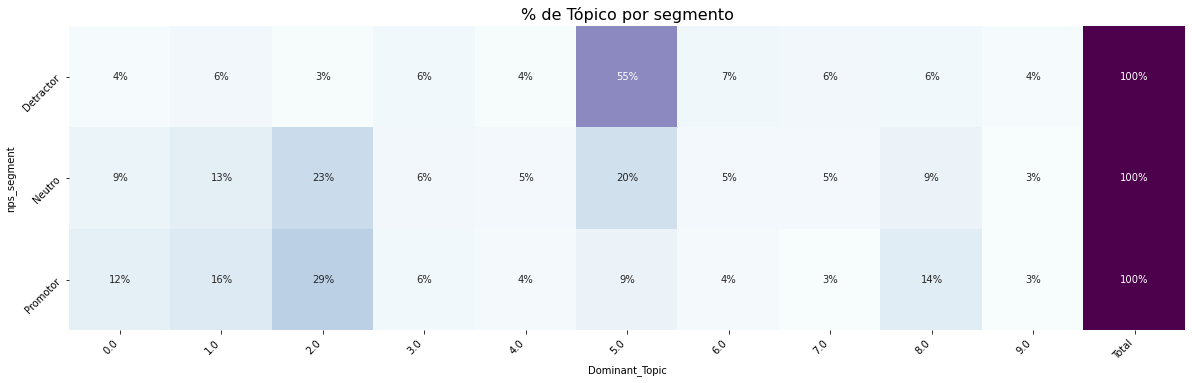

In [50]:

plt.figure(figsize = (20,20))
htmap = sns.heatmap(tabla_segment_per,annot = True,square = True,   fmt='.0%', cbar = False, cmap="BuPu")

#htmap.set_xticklabels(htmap.get_xticklabels(), rotation=45, horizontalalignment='right')

htmap.set_yticklabels(htmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('% de Tópico por segmento', fontsize = 16) 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
     
)

htmap

# Texto característico por tópico

A veces, las palabras clave del tema pueden no ser suficientes para entender de qué trata un tema. Entonces, para ayudar a comprender el tema, puede encontrar los documentos a los que un tema determinado ha contribuido más e inferir el tema leyendo ese documento.

# Characteristic text per topic

Sometimes topic keywords may not be enough to understand what a topic is about. So to help you understand the topic, you can find the documents to which a certain topic has contributed the most and infer the topic by reading that document

In [51]:
# cuento Documentos por cada tópico
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# porcentaje de documentos por tópico
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Me quedo con el número de tópico y palabras clave
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# concateno
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Cambio de nombre de columnas
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']


### Concateno las 5 frases top por tópico

In [52]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]



In [53]:
# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8504,"rapidez, eficiencia, resolucion, problema, resolver, solucionar, siniestro, amables, cumplen, seguridad",Tuve un siniestro y todavía estoy esperando a que se contacten para resolver el tema de la cerradura.
1,1.0,0.9000,"atencion, rapidez, personal, cliente, telefonica, tramite, auxilio, amable, sucursal, cordial",La rapidez del auxilio de grúa y la calidad del personal de atención y chofer de grúa
2,2.0,0.8875,"bueno, bueno_atencion, servicio, rapidez, trato, auxilio, predisposicion, personal, asesoramiento, cobertura","Excelente trato,muy bien explicado por personal muy bien capacitado"
3,3.0,0.9000,"siempre, problema, nunca, caja, ningun, ahora, momento, inconvenientes, siniestro, seguro","No haber tenido problemas con la Caja hasta este momento,mejorando este inconveniente,puede mejorar el puntaje."
4,4.0,0.9571,"auxilio, cumplimiento, tiempo, tiempo_forma, aca, siempre, demora, confiable, xq, llegar",razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón razón
5,5.0,0.9700,"seguro, mas, caja, si, auto, poliza, anos, solo, siniestro, bueno","ME HICIERON UNA BONIFICACIÓN DEL 30% EN LA CUOTA DEL SEGURO SOLO PORQUE UN AMIGO ME AVISO, DESPUÉS DE 30 AÑOS DE CONTRATAR EL SEGURO EN LA CAJA, LA PRACTICA ES DESLEAL SINO ME QUEJO O NO ME AVISAN NO TENGO LA PROMOCION,,,CASTIGAN A LOS QUE PAGAN POR DEBITO Y NO SE FIJAN EL CARGO,,SI NO ME AVISA UN PARIENTE, CHAU PERDISTE,,,Y LA EXCUSA QUES ES UNA PROMOCION NO ME CABE UNA PROMOCIÓN PARA EL QUE SE AVIVA"
6,6.0,0.8727,"servicio, conforme, auxilio, auto, seriedad, dias, vehiculo, persona, luego, lugar",La verdad un vehículo q solo tiene una abolladura solo dan responsabilidad civil
7,7.0,0.8327,"precio, servicios, caro, confianza, agil, seguro, precios, empresa, contratacion, mejor",los precios podriian ser más bajos.
8,8.0,0.8875,"respuesta, rapidez, problema, solucion, siempre, solucionaron, siniestro, necesite, resolvieron, inconveniente","Las veces que solicité asistencia tuve respuesta rápida, y solucionaron el problema."
9,9.0,0.8209,"inmediata, informacion, amabilidad, puntualidad, cordialidad, clientes, empleados, inconvenientes, atienden, comunicacion",Mi solicitud fue canalizada en forma inmediata. Gracias.


### Representatividad de los tópicos

Calculo la cantidad de documentos por tópicos

In [54]:
# Show
df_dominant_topics.dropna()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"bueno, bueno_atencion, servicio, rapidez, trato, auxilio, predisposicion, personal, asesoramiento, cobertura",3570.0,0.1033
1.0,0.0,"rapidez, eficiencia, resolucion, problema, resolver, solucionar, siniestro, amables, cumplen, seguridad",4860.0,0.1406
2.0,2.0,"bueno, bueno_atencion, servicio, rapidez, trato, auxilio, predisposicion, personal, asesoramiento, cobertura",8258.0,0.2389
3.0,3.0,"siempre, problema, nunca, caja, ningun, ahora, momento, inconvenientes, siniestro, seguro",2036.0,0.0589
4.0,4.0,"auxilio, cumplimiento, tiempo, tiempo_forma, aca, siempre, demora, confiable, xq, llegar",1564.0,0.0452
5.0,5.0,"seguro, mas, caja, si, auto, poliza, anos, solo, siniestro, bueno",6229.0,0.1802
6.0,5.0,"seguro, mas, caja, si, auto, poliza, anos, solo, siniestro, bueno",1650.0,0.0477
7.0,9.0,"inmediata, informacion, amabilidad, puntualidad, cordialidad, clientes, empleados, inconvenientes, atienden, comunicacion",1342.0,0.0388
8.0,6.0,"servicio, conforme, auxilio, auto, seriedad, dias, vehiculo, persona, luego, lugar",4111.0,0.1189
9.0,5.0,"seguro, mas, caja, si, auto, poliza, anos, solo, siniestro, bueno",952.0,0.0275


In [55]:
playsound('war.mp3')